In [66]:
import seaborn as sns
import pandas as pd
df_tips = sns.load_dataset("tips")
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [67]:
df_tips.shape

(244, 7)

In [68]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [69]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [70]:
df_tips.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [71]:
df_tips_stats = df_tips.loc[: , ["total_bill","sex" ,"smoker","day","tip","size"]]
df_tips_stats.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


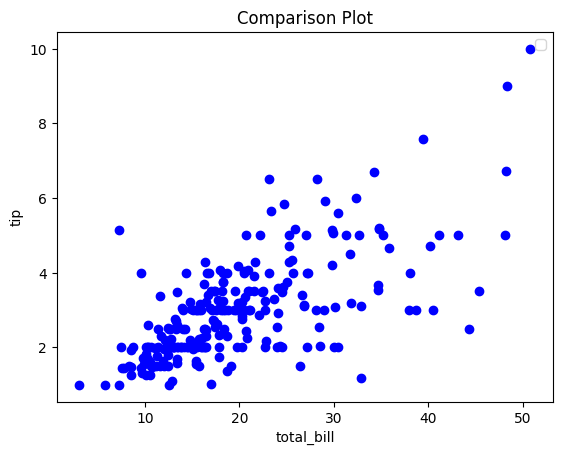

In [72]:
from cProfile import label
from turtle import color
import matplotlib.pyplot as plt
def Plotgraph(df , x_col , y_col):
    plt.scatter(df_tips_stats[x_col], df_tips_stats[y_col], marker= 'o' , color = 'blue')
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.title('Comparison Plot')
    plt.legend("")
    plt.show()

Plotgraph(df_tips_stats, "total_bill" , "tip")


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18308\2769352925.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(x_col)[y_col].mean()


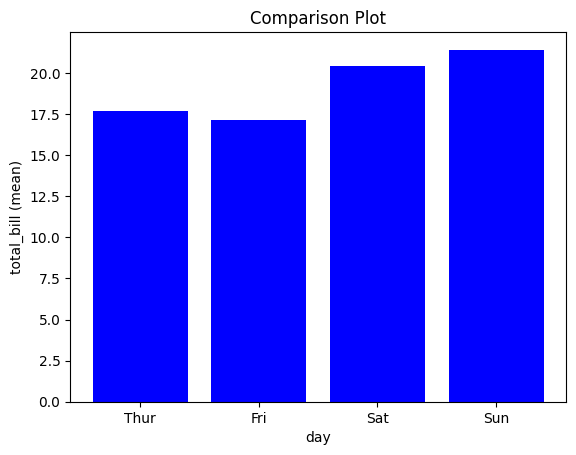

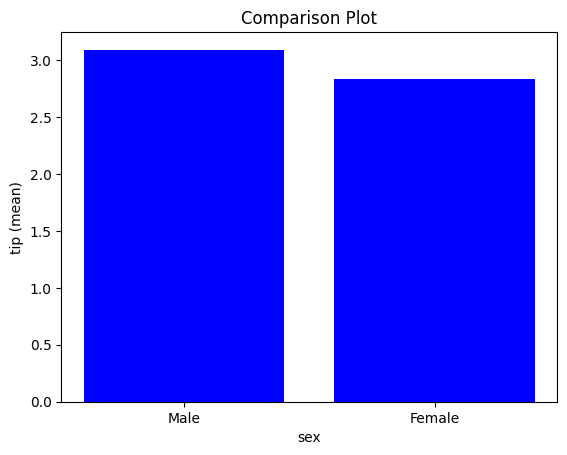

In [73]:
import matplotlib.pyplot as plt

def Plotgraph(df, x_col, y_col):
    # Group by the x column and calculate the mean of the y column for each group
    grouped_data = df.groupby(x_col)[y_col].mean()
    
    # Create bar plot
    plt.bar(grouped_data.index, grouped_data.values, color='blue')
    
    # Set labels and title
    plt.xlabel(x_col)
    plt.ylabel(y_col + " (mean)")
    plt.title('Comparison Plot')
    
    # Show plot
    plt.show()

# Example usage:
Plotgraph(df_tips_stats, "day", "total_bill")
Plotgraph(df_tips_stats, "sex", "tip")



In [74]:
df_tips_stats = df_tips.loc[: , ["total_bill","tip","size"]]
df_tips_stats.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Splitting the dataset

In [75]:
X, y = df_tips_stats.drop("total_bill" , axis = 1 ), df_tips_stats["tip"]
y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

# Test/train data spliting

In [81]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train, y_test = train_test_split(X , y ,test_size = 0.3 , random_state= 42 )
print("Column names in X_train:", X_train.columns)
print("Column names in X_test:", X_test.columns)
y_test

Column names in X_train: Index(['tip', 'size'], dtype='object')
Column names in X_test: Index(['tip', 'size'], dtype='object')


24     3.18
6      2.00
153    2.00
211    5.16
198    2.00
       ... 
165    3.48
154    2.00
216    3.00
79     2.71
29     3.00
Name: tip, Length: 74, dtype: float64

In [82]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()


scaled_X_train = scaler.fit_transform(X_train)


scaled_X_test = scaler.transform(X_test)


mean_scaled_X_train = scaled_X_train.mean(axis=0)
mean_scaled_X_test = scaled_X_test.mean(axis=0)
std_scaled_X_train = scaled_X_train.std(axis=0)
std_scaled_X_test = scaled_X_test.std(axis=0)


print("scaled_X_train (total_bill, size) mean:", mean_scaled_X_train)
print("scaled_X_test (total_bill, size) mean:", mean_scaled_X_test)
print("scaled_X_train (total_bill, size) std:", std_scaled_X_train)
print("scaled_X_test (total_bill, size) std:", std_scaled_X_test)


scaled_X_train (total_bill, size) mean: [ 1.30614473e-16 -1.04491579e-16]
scaled_X_test (total_bill, size) mean: [-0.20456041 -0.04491163]
scaled_X_train (total_bill, size) std: [1. 1.]
scaled_X_test (total_bill, size) std: [0.78564206 1.06228803]


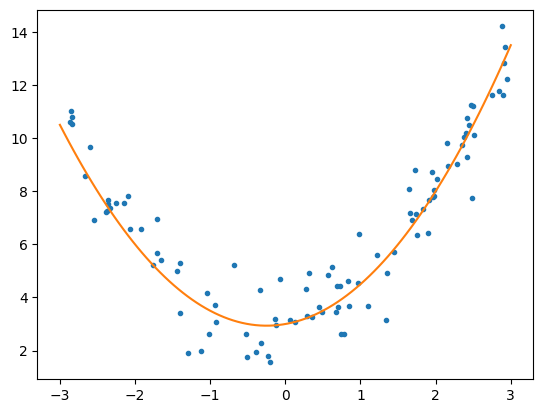

In [88]:
import numpy as np
# a0 = 3, a1 = 0.5, a2 = 1
f = lambda x: x**2 + 0.5*x + 3
samples = 100 
X = np.random.uniform(-3,3, (samples, 1))
# y = a0 + a1x + a2x^2 + epsilon
y = f(X) + np.random.randn(samples, 1)

# linspace gives equally spaced numbers between low and high
# between -3 and 3 we get 100 equally spaced numbers
x = np.linspace(-3,3, samples )

plt.plot(X,y, '.')
plt.plot(x, f(x))


In [86]:
X.shape

(100, 1)

In [ ]:
from networkx import degree
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2 , include_bias= False)
